In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import copy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from decompose_compose.pipeline import *
from utils.results_visualization import save_results

warnings.filterwarnings("ignore")

[Taichi] version 1.7.0, llvm 15.0.4, commit 2fd24490, linux, python 3.11.7


[I 02/03/24 00:30:06.397 71796] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout
2024-02-03 00:30:07.866857: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-03 00:30:07.887301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 00:30:07.887328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 00:30:07.887914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for p

# Default usage from configuration file

In [3]:
default_feature_sampler_limitations = {
    'class_type': {
        'ne': 0
    },
    'main_diag_height': {
        'ge': 20
    },
    'main_diag_width': {
        'ge': 20
    }
}

In [4]:
pipeline = Pipeline(
    project_config_path='configs/basic_cpu_project_config.json',
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 10}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


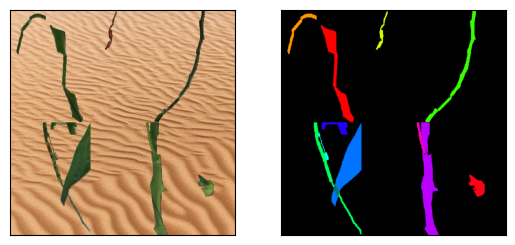

In [5]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

# Use all data

Without *feature_sampler_limitations* some object parts are too smal to transform, therefore they are added without spatial transformations

In [6]:
pipeline = Pipeline(
    project_config_path='configs/basic_cpu_project_config.json',
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 10}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


Skipping invalid transform with img.shape=(45, 1, 3)
Skipping invalid transform with img.shape=(63, 1, 3)
Skipping invalid transform with img.shape=(8, 1, 3)


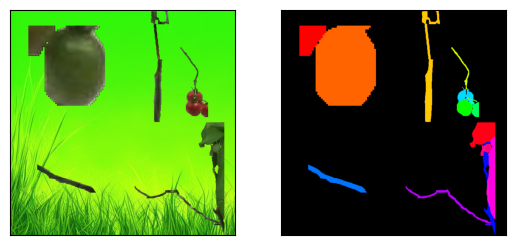

In [7]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

# Change config in script

In [8]:
default_config = {
        "device": "cpu",
        "composition_mode": "modification",
        "blending_mode": "base",
        "object_prefix": "plant_",
        "dataset_names": [
            "Tomato detection"
        ],
        "result_sizes": [
            [640, 640]
        ],
        "force_repreparation": False,
        "augmentations_config_path": "./configs/augmentation_config.py",
        "background_generation": {
            "storage_path": "./tmp_data/background_storage/",
            "requires_model": True,
            "samples_per_dataset": 3
        },
        "sampling": {
            "num_objects_per_image": "random_from_data",
            "object_schema_mode": "random_from_data",
            "max_parts_per_object": 15
        },
        "object_placement": "uniform_2d"
    }

In [9]:
pipeline = Pipeline(
    project_config=default_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


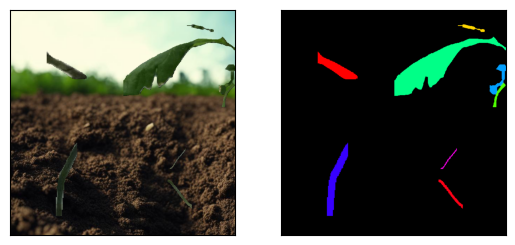

In [10]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

## Using multiple datasets

In [11]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['fruit_plants', 'Cassava Leaf Disease', 'Corn or Maize Leaf Disease', 'flower_classification', 'Herbarium', 'Plant Pathology', 'Tomato detection', 'Wild Edible Plants']

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['fruit_plants', 'Cassava Leaf Disease', 'Corn or Maize Leaf Disease', 'flower_classification', 'Herbarium', 'Plant Pathology', 'Tomato detection', 'Wild Edible Plants'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


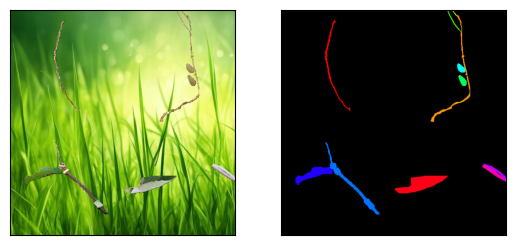

In [12]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

## Change verbocity

In [13]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['fruit_plants', 'Wild Edible Plants']

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.prepare()

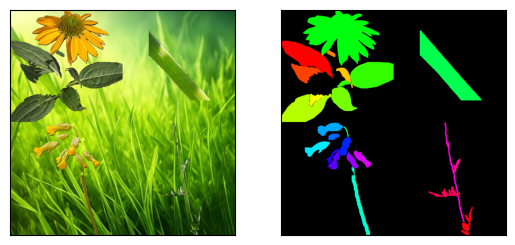

In [14]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

# Change number of objects

In [15]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['fruit_plants', 'Wild Edible Plants']

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['fruit_plants', 'Wild Edible Plants'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'uniform_2d', 'verbose': 1}


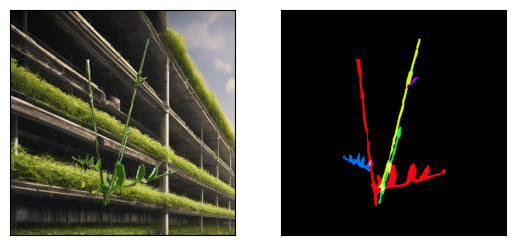

In [16]:
generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)

The next cell may take a long time for complex datasets

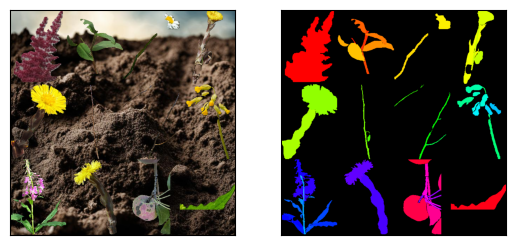

In [17]:
generated_scene, mask_part_list = pipeline.run(num_objects=12)
save_results(generated_scene, mask_part_list)

## Change *result_sizes*

In [18]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['result_sizes'] = [[1280, 640], [640, 1280]]

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[1280, 640], [640, 1280]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


Upscaling image via interporation


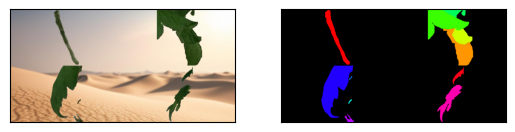

In [19]:
generated_scene, mask_part_list = pipeline.run(num_objects=4)
save_results(generated_scene, mask_part_list)

## Create new objects

In [20]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['composition_mode'] = 'creation' # modification creation
new_config['sampling']['object_schema_mode'] = 'random' # random random_from_data

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.prepare()

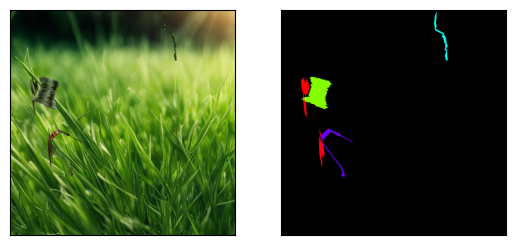

In [21]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

In [22]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['composition_mode'] = 'creation' # modification creation
new_config['sampling']['object_schema_mode'] = 'random_from_data' # random random_from_data

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.prepare()

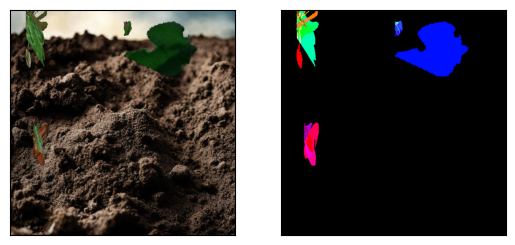

In [23]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

# Object placement

In [24]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['object_placement'] = 'uniform_2d'

pipeline = Pipeline(
    project_config_path='configs/basic_cpu_project_config.json',
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 10}, 'object_placement': 'uniform_2d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


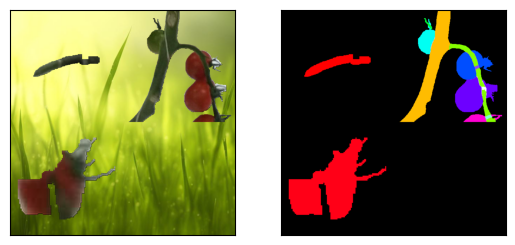

In [25]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

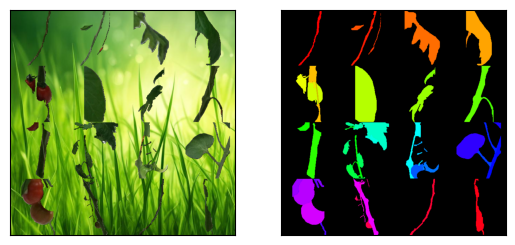

In [26]:
generated_scene, mask_part_list = pipeline.run(num_objects=16)
save_results(generated_scene, mask_part_list)

In [27]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['object_placement'] = 'uniform_1d'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'uniform_1d', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


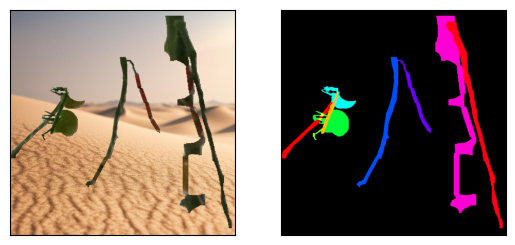

In [28]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

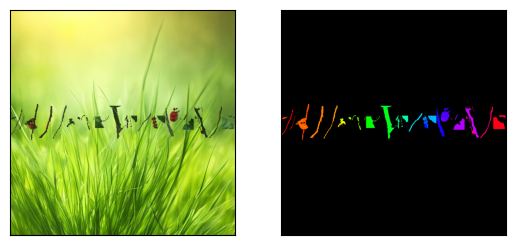

In [29]:
generated_scene, mask_part_list = pipeline.run(num_objects=16)
save_results(generated_scene, mask_part_list)

In [30]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['object_placement'] = 'random'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'random', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


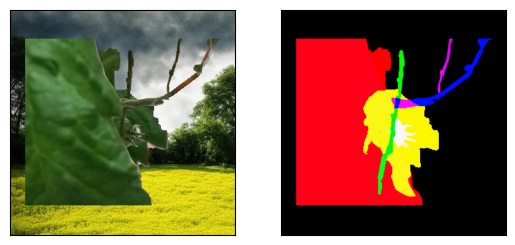

In [31]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

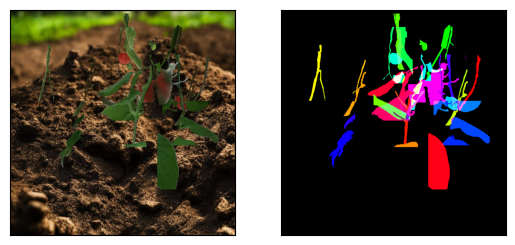

In [32]:
generated_scene, mask_part_list = pipeline.run(num_objects=16)
save_results(generated_scene, mask_part_list)

In [33]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['object_placement'] = 'no_overlap'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=1
)

pipeline.prepare()

{'device': 'cpu', 'composition_mode': 'modification', 'blending_mode': 'base', 'object_prefix': 'plant_', 'dataset_names': ['Tomato detection'], 'result_sizes': [[640, 640]], 'force_repreparation': False, 'augmentations_config_path': './configs/augmentation_config.py', 'background_generation': {'storage_path': './tmp_data/background_storage/', 'requires_model': True, 'samples_per_dataset': 3}, 'sampling': {'num_objects_per_image': 'random_from_data', 'object_schema_mode': 'random_from_data', 'max_parts_per_object': 15}, 'object_placement': 'no_overlap', 'verbose': 1}
Using existing backgrounds from ./tmp_data/background_storage/


2 objects will overlap more than 20%


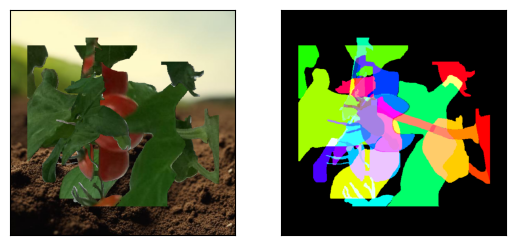

In [34]:
generated_scene, mask_part_list = pipeline.run(num_objects=3)
save_results(generated_scene, mask_part_list)

10 objects will overlap more than 20%


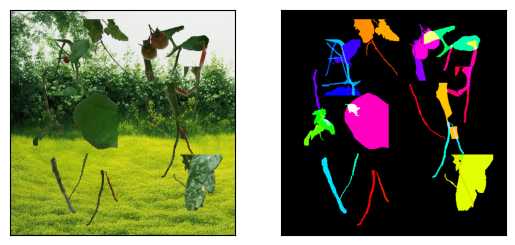

In [35]:
generated_scene, mask_part_list = pipeline.run(num_objects=16)
save_results(generated_scene, mask_part_list)

# Altering basic augmentations

In [36]:
new_config = copy.deepcopy(default_config)
new_config['dataset_names'] = ['Tomato detection']
new_config['composition_mode'] = 'creation' # modification creation
new_config['sampling']['object_schema_mode'] = 'random_from_data' # random random_from_data
new_config['augmentations_config_path'] = './configs/augmentation_config_strong.py'

pipeline = Pipeline(
    project_config=new_config,
    feature_sampler_limitations=default_feature_sampler_limitations,
    verbose=0
)

pipeline.prepare()

Skipped part transformation
Skipped part transformation


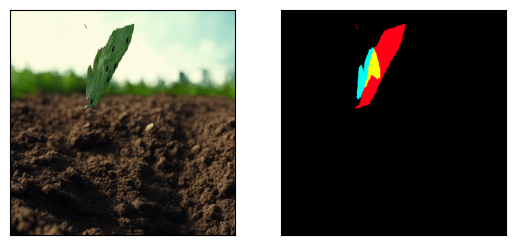

In [37]:
generated_scene, mask_part_list = pipeline.run(num_objects=1)
save_results(generated_scene, mask_part_list)